# vta - Mini Challenge - Gradient Descent 

Das Ziel dieser Aufgabe besteht darin, dass Sie ein grundlegendes Verständnis für numerische
Näherungsverfahren in höheren Dimensionen erlangen, insbesondere für den Gradient Descent
und dessen praktische Anwendung. Hierfür sollen Sie ein Jupyter Notebook erstellen und das
MNIST Dataset laden und erkunden. Anschließend sollen Sie ein neuronales Netzwerk erstellen
und trainieren, um die Bilder korrekt zu klassifizieren. Es dürfen nur die angegebenen Python
packages verwendet werden.  
Ziel dieser Aufgabe ist nicht nur, Ihre mathematischen Kenntnisse unter Beweis zu stellen, sondern
auch die entsprechende Kommunikation und Präsentation Ihrer Ergebnisse. Ihre Abgaben sollen
also nicht nur mathematisch korrekt, sondern auch leicht verständlich und reproduzierbar
sein. Genauere Angaben zu den Erwartungen an die Abgabe finden Sie in den Auswertungskriterien.
Dokumentieren Sie ihren Arbeitsfortschritt und Erkenntnisgewinn in Form eines Lerntagebuchs,
um Lernfortschritte, Schwierigkeiten und Erkenntnisse festzuhalten.
Die folgenden Aufgabenstellungen präzisieren die einzelnen Bearbeitungsschritte und geben die
Struktur des Notebooks vor.

Diese Challenge wurde im FS23 erarbeitet von:  
Patrik Schürmann   
Tobias Buess  
Si Ben Tran   

---

# Aufgabe 1 
Laden Sie das MNIST-Dataset mithilfe des torchvision-Pakets (Verwenden Sie das torchvision
Paket für diese Aufgabe) und verwenden Sie matplotlib, um sich einen Überblick über die Daten
zu verschaffen. Beschreiben Sie das grundlegenden Eigenschaften des Datensets, z.B. wie viele
und welche Daten es enthält.

**Dataset**
1) Sind Trainings und Testdaten des MNIST-Dataset korrekt mithilfe des torchvision-Pakets
geladen worden?
2) Die grundlegenden Eigenschaften des MNIST-Datasets werden richtig beschrieben.
3) Die Visualisierungen der Daten sind gut verständlich und representativ.

In [1]:
# Libraries Laden 
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import unittest

In [2]:
# 1. Trainings und Testdaten des MNIST-Dataset mithilfe torchvision laden

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True)

In [3]:
# 2. Eigenschaften des MNIST-Datasets beschreiben

# Ausgabe der Trainings- und Testdaten shape
print("Train Dataset Shape: ", train_dataset.data.shape)
print("Validation Dataset Shape: ", test_dataset.data.shape)

# Ausgabe der Anzahl der Trainings- und Testbilder
print(f"Anzahl der Trainingsbilder: {len(train_dataset.data)}")
print(f"Anzahl der Testbilder: {len(test_dataset.data)}")

# Dimension der Trainings- und Testbilder
print(f"Bildauflösung der Trainingsbilder: {train_dataset.data[0].shape}")
print(f"Bildauflösung der Testbilder: {test_dataset.data[0].shape}")

Train Dataset Shape:  torch.Size([60000, 28, 28])
Validation Dataset Shape:  torch.Size([10000, 28, 28])
Anzahl der Trainingsbilder: 60000
Anzahl der Testbilder: 10000
Bildauflösung der Trainingsbilder: torch.Size([28, 28])
Bildauflösung der Testbilder: torch.Size([28, 28])


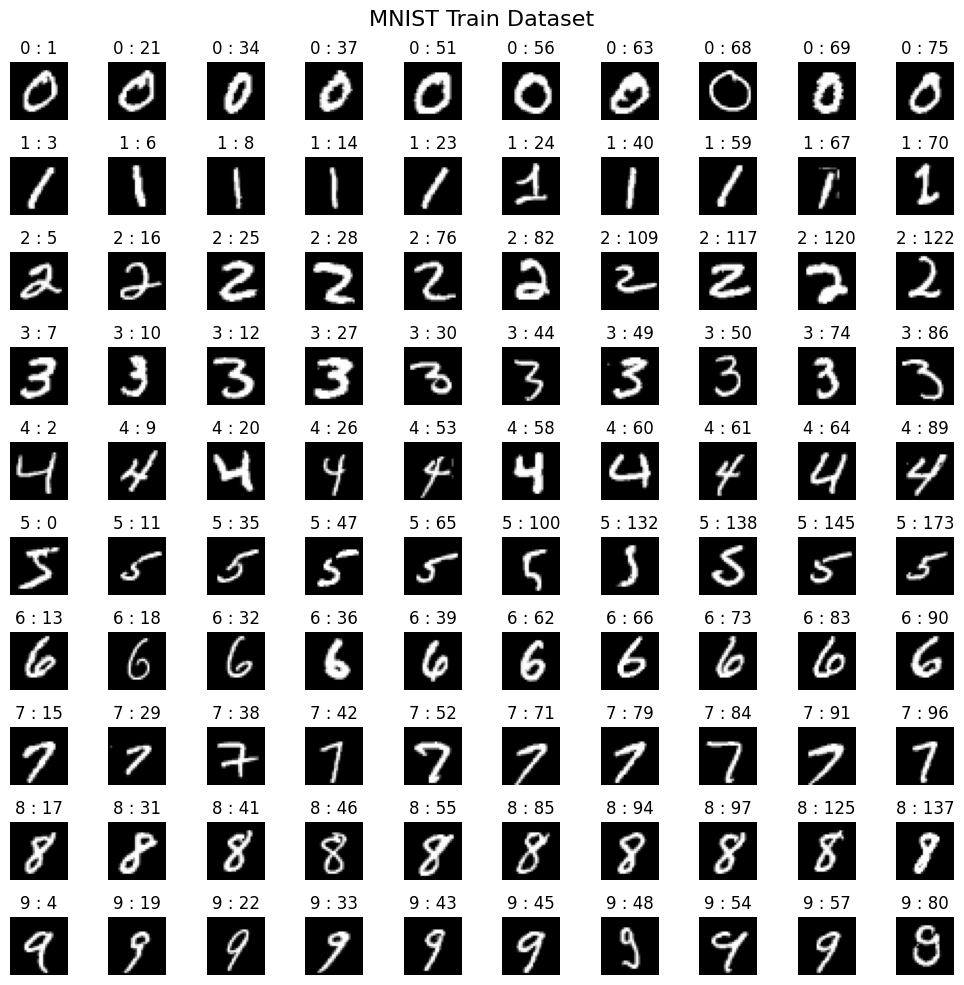

In [4]:
# 3. Visualisierung der Daten 

# Ausgabe der Bilder des MNIST-Datasets
def visualize_mnist_grid(dataset = train_dataset, title = 'MNIST Dataset'):
    # Erstellen eines 10x10-Subplots
    fig, axs = plt.subplots(10, 10, figsize=(10, 10))

    # Durchlaufen der Subplots und Zuordnung der Bilder
    for i in range(10):
        for j in range(10):
            # Finden des nächsten Bildes mit der Klasse i
            idx = np.where(dataset.targets == i)[0][j]
            # Laden des Bildes
            img = dataset.data[idx]
            # Anzeigen des Bildes
            axs[i, j].imshow(img, cmap='gray')
            axs[i, j].set_title(f"{i} : {idx}")
            axs[i, j].axis('off')
            fig.suptitle(title, fontsize=16)

    # Einstellen des Layouts und Anzeigen des Grids
    plt.tight_layout()
    plt.show()

# Funktion ausführen
visualize_mnist_grid(train_dataset, "MNIST Train Dataset")

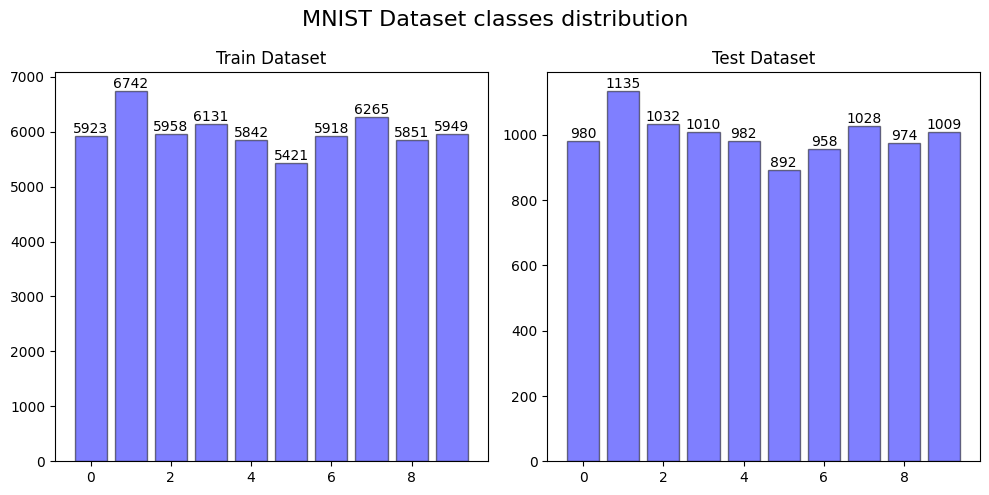

In [5]:
# visualize distritbution of classes with bar chart for train and test dataset
def visualize_mnist_bar(dataset_train = train_dataset, dataset_test = test_dataset, title = 'MNIST Dataset'):
    # Erstellen eines 10x10-Subplots
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Durchlaufen der Subplots und Zuordnung der Bilder
    for i in range(2):
        if i == 0:
            axs[i].bar(np.unique(dataset_train.targets), np.unique(dataset_train.targets, return_counts=True)[1], color='blue', alpha=0.5, linewidth=1, edgecolor='black' )
            axs[i].set_title("Train Dataset")
            # add numbers to bars
            for j in range(len(np.unique(dataset_train.targets))):
                axs[i].text(j, np.unique(dataset_train.targets, return_counts=True)[1][j], np.unique(dataset_train.targets, return_counts=True)[1][j], ha='center', va='bottom')
        else:
            axs[i].bar(np.unique(dataset_test.targets), np.unique(dataset_test.targets, return_counts=True)[1], color = "blue", alpha=0.5, linewidth=1, edgecolor='black' )
            axs[i].set_title("Test Dataset")
            # add numbers to bars
            for j in range(len(np.unique(dataset_test.targets))):
                axs[i].text(j, np.unique(dataset_test.targets, return_counts=True)[1][j], np.unique(dataset_test.targets, return_counts=True)[1][j], ha='center', va='bottom')
    
    fig.suptitle(title, fontsize=16)
    # Einstellen des Layouts und Anzeigen des Grids
    plt.tight_layout()
    plt.show()

# Funktion ausführen
visualize_mnist_bar(dataset_train = train_dataset, dataset_test = test_dataset, title = "MNIST Dataset classes distribution")


---

# Aufgabe 2
Erstellen Sie eine Klasse für ein lineares Layer mit beliebig vielen Knoten. Implementieren Sie die
Methoden forward, backward und update mithilfe von numpy. Schreiben sie geeignete Unittests,
um die Funktionsweise der Funktion zu prüfen.

**Linear Layer**

4) Die Klasse für ein lineares Layer wurde mit beliebig vielen Knoten korrekt implementiert.
5) Es wurden geeignete Unittests geschrieben, um die Funktionsweise der Klasse zu prüfen.
(Richtige Berechnung des Gradienten bei mind. zwei Datenpunkten)

In [13]:
class LinearLayer:
    """
    Eine Lineare Schicht in einem neuronalen Netzwerk. Die Schicht besteht aus einer Matrix von Gewichten,
    einem Vektor von Biaswerten und Methoden zur Vorwärts- und Rückwärtsdurchlauf durch die Schicht.
    """
    
    def __init__(self, input_dim, output_dim):
        """
        Initialisiert die Gewichte und Biaswerte der Schicht.
        
        :param input_dim: Dimension des Eingabevektors
        :param output_dim: Dimension des Ausgabevektors
        """
        self.weights = np.random.randn(output_dim, input_dim)
        self.bias = np.random.randn(1, output_dim)
        self.input = None
    
    def forward(self, input):
        """
        Führt einen Vorwärtsdurchlauf durch die Schicht aus, unter Verwendung der Sigmoid-Aktivierungsfunktion.

        :param input: Eingabevektor mit Dimension (batch_size, input_dim)
        :return: Ausgabevektor mit Dimension (batch_size, output_dim)
        """
        self.input = input
        return self.sigmoid(np.dot(input, self.weights.T) + self.bias)
    
    def backward(self, grad_output):
        """
        Führt einen Rückwärtsdurchlauf durch die Schicht aus und berechnet die Gradienten von Eingabe, Gewichten und Bias.
        
        :param grad_output: Gradienten der Ausgabe mit Dimension (batch_size, output_dim)
        :return: Gradienten der Eingabe mit Dimension (batch_size, input_dim), 
                 Gradienten der Gewichte mit Dimension (output_dim, input_dim),
                 Gradienten des Bias mit Dimension (1, output_dim)
        """
        grad_input = np.dot(grad_output, self.weights) * self.sigmoid_derivative(self.input)
        grad_weights = np.dot(grad_output.T, self.input)
        grad_bias = np.sum(grad_output, axis=0, keepdims=True)
        return grad_input, grad_weights, grad_bias
    
    def sigmoid_derivative(self, x):
        """
        Berechnet die Ableitung der Sigmoid-Funktion für einen Eingabevektor.
        
        :param x: Eingabevektor
        :return: Ableitung der Sigmoid-Funktion
        """
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def sigmoid(self, x):
        """
        Berechnet die Sigmoid-Funktion für einen Eingabevektor.
        
        :param x: Eingabevektor
        :return: Ausgabevektor der Sigmoid-Funktion
        """
        return 1 / (1 + np.exp(-x))
    
    def update(self, grad_weights, grad_bias, learning_rate):
        """
        Aktualisiert die Gewichte und den Versatz der Schicht mit gegebener Lernrate und Gradienten.

        Args:
            grad_weights (ndarray): Gradienten-Array der Gewichte.
            grad_bias (ndarray): Gradienten-Array des Versatzes.
            learning_rate (float): Lernrate, die für die Aktualisierung verwendet wird.
        """
        # Anpassung der Gewichte und Versätze mit gegebener Lernrate und Gradienten
        self.weights -= learning_rate * grad_weights
        self.bias -= learning_rate * grad_bias

#(ChatGPT)

In [9]:
# Erzeugen einer Instanz der LinearLayer-Klasse
layer = LinearLayer(input_dim=3, output_dim=5)

# Erzeugen eines Beispiel-Eingabe-Arrays mit 2 Beobachtungen und 3 Features
input_array = np.array([[1, 2, 3], [4, 5, 6]])

# Durchführen des Vorwärtsdurchlaufs
output_array = layer.forward(input_array)

# Ausgabe der Eingabe und Ausgabe-Arrays
print("Input array:\n", input_array)
print("Output array:\n", output_array)

#(ChatGPT)

Input array:
 [[1 2 3]
 [4 5 6]]
Output array:
 [[0.95760643 0.18712441 0.95636968 0.80069763 0.68728878]
 [0.99920492 0.09228492 0.99642614 0.98925449 0.32954199]]


In [37]:
# Erzeugen einer Instanz der LinearLayer-Klasse
layer = LinearLayer(input_dim=3, output_dim=5)

# Numpy Array von den ersten 3 Beobachtungen des Trainingsdatensatzes
input_array = np.array(train_dataset.data[:3].reshape(3, -1))


(3, 784)

In [10]:
class TestLinearLayer(unittest.TestCase):
    
    def test_forward_output_shape(self):
        # Testet, ob die Ausgabe der Vorwärtsdurchlaufmethode die erwartete Form hat
        input_dim = 2
        output_dim = 3
        layer = LinearLayer(input_dim, output_dim)
        x = np.random.randn(4, input_dim)
        output = layer.forward(x)
        expected_output_shape = (4, output_dim)
        self.assertEqual(output.shape, expected_output_shape)
    
    def test_backward_output_shape(self):
        # Testet, ob die Ausgabe der Rückwärtsdurchlaufmethode die erwartete Form hat
        input_dim = 2
        output_dim = 3
        layer = LinearLayer(input_dim, output_dim)
        x = np.random.randn(4, input_dim)
        output = layer.forward(x)
        grad_output = np.random.randn(4, output_dim)
        grad_input, grad_weights, grad_bias = layer.backward(grad_output)
        expected_grad_input_shape = (4, input_dim)
        expected_grad_weights_shape = (output_dim, input_dim)
        expected_grad_bias_shape = (1, output_dim)
        self.assertEqual(grad_input.shape, expected_grad_input_shape)
        self.assertEqual(grad_weights.shape, expected_grad_weights_shape)
        self.assertEqual(grad_bias.shape, expected_grad_bias_shape)

# Lade die Testfunktionen
suite = unittest.TestLoader().loadTestsFromTestCase(TestLinearLayer)

# Führe die Tests aus
unittest.TextTestRunner().run(suite)

..
----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

---

# Aufgabe 3
Erstellen Sie ein neuronales Netzwerk in numpy mit einem Hidden Linear Layer und einem Output
Knoten. Trainieren Sie das Netzwerk darauf, die Ziffer 4 korrekt zu identifizieren (d.h. der Output
soll 1 für diese Ziffer und 0 für alle anderen Ziffern sein). Trainieren Sie das Netzwerk auf den
Trainingsdaten und evaluieren Sie es anhand von Testdaten. Verwenden Sie eine geeignete Loss-
Funktion sowie Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen
Sie Ihre Wahl mit einer Abwägung der Vor- und Nachteile. Diskutieren Sie kurz weitere Optionen
für Loss und Accuracy.

**Single Layer Model**

6) Das neuronale Netzwerk wurde mit einem Hidden Layer beliebiger Grösse und einem Output
Knoten korrekt implementiert.
7) Geeignete Loss- und Accuracy-Funktionen wurden verwendet.
8) Die Wahl wurde begründet und mit anderen mögliche Funktionen verglichen?
9) Die mathematische Definition der Loss-Funktion und Accuracy-Funktion ist korrekt angegeben
(gerendert in Latex)?
10) Die geeignete Loss-Funktion und Accuracy-Funktion wurde korrekt implementiert.

In [59]:
class BinaryCrossEntropyLoss:
    """
    Binary Cross Entropy Loss Funktion
    """
    def __init__(self):
        pass
    
    def forward(self, y_pred, y_true):
        """
        Berechnet den Loss für eine Vorhersage y_pred im Vergleich zu den wahren Werten y_true.
        """
        return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
    
    def backward(self, y_pred, y_true):
        """
        Berechnet die Ableitung des Losses im Vergleich zu y_pred.
        """
        return (y_pred-y_true) / (y_pred*(1-y_pred))

class SoftmaxLayer:
    """
    Softmax-Layer, der auf den Ausgaben der vorherigen Schicht angewendet wird.
    """
    def __init__(self):
        pass
    
    def forward(self, X):
        """
        Führt eine Softmax-Aktivierung auf den Eingabevektor X aus.

        :param X: Eingabevektor mit Dimension (batch_size, num_classes)
        :return: Ausgabevektor mit Dimension (batch_size, num_classes)
        """
        exp_X = np.exp(X - np.max(X, axis=1, keepdims=True))
        return exp_X / np.sum(exp_X, axis=1, keepdims=True)
    
    def backward(self, X):
        """
        Berechnet die Ableitung der Softmax-Aktivierung.

        :param X: Eingabevektor mit Dimension (batch_size, num_classes)
        :return: Gradienten der Eingabe mit Dimension (batch_size, num_classes)
        """
        p = self.forward(X)
        return p * (1 - p)


class NeuralNetwork:
    """
    Ein neuronales Netzwerk, bestehend aus einer Input-Schicht, einer versteckten Schicht und einer Output-Schicht.
    """
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Initialisiert die Schichten des Netzwerks.

        :param input_dim: Dimension des Eingabevektors
        :param hidden_dim: Dimension des versteckten Vektors
        :param output_dim: Dimension des Ausgabevektors
        """
        self.input_layer = LinearLayer(input_dim, hidden_dim)
        self.hidden_layer = LinearLayer(hidden_dim, output_dim)
        self.softmax_layer = SoftmaxLayer()
        self.loss = BinaryCrossEntropyLoss()
    
    def forward(self, X):
        """
        Führt einen Vorwärtsdurchlauf durch das Netzwerk aus.

        :param X: Eingabevektor mit Dimension (batch_size, input_dim)
        :return: Ausgabevektor mit Dimension (batch_size, output_dim)
        """
        hidden_out = self.hidden_layer.forward(self.input_layer.forward(X))
        return self.softmax_layer.forward(hidden_out)
    
    def backward(self, X, y_true):
        """
        Führt einen Rückwärtsdurchlauf durch das Netzwerk aus und berechnet die Gradienten von Eingabe, Gewichten und Bias.

        :param X: Eingabevektor mit Dimension (batch_size, input_dim)
        :param y_true: Vektor mit wahren Ausgaben
        :return: Gradienten der Eingabe mit Dimension (batch_size, input_dim),
                Gradienten der Gewichte mit Dimension (output_dim, input_dim),
                Gradienten des Bias mit Dimension (1, output_dim)
        """
        y_pred = self.forward(X)
        grad_loss = self.loss.backward(y_pred, y_true)
        grad_softmax = self.softmax_layer.backward(self.hidden_layer.output)
        grad_hidden, grad_weights2, grad_bias2 = self.hidden_layer.backward(grad_loss * grad_softmax)
        grad_input, grad_weights1, grad_bias1 = self.input_layer.backward(grad_hidden)
        
        self.grad_weights1 = grad_weights1
        self.grad_bias1 = grad_bias1
        self.grad_weights2 = grad_weights2
        self.grad_bias2 = grad_bias2
    
    def update(self, learning_rate):
        """
            Aktualisiert die Gewichte und den Bias des Netzwerks mit gegebener Lernrate und Gradienten.

            :param learning_rate: Lernrate, die für die Aktualisierung verwendet werden soll
        """
        self.input_layer.weights -= learning_rate * self.grad_weights1
        self.input_layer.bias -= learning_rate * self.grad_bias1
        self.hidden_layer.weights -= learning_rate * self.grad_weights2
        self.hidden_layer.bias -= learning_rate * self.grad_bias2

#(ChatGPT)

In [60]:
net = NeuralNetwork(3, 5, 5)

# Erzeugen eines Beispiel-Eingabe-Arrays mit 2 Beobachtungen und 3 Features
input_array = np.array([[1, 2, 3], [4, 5, 6]])

# Durchführen des Vorwärtsdurchlaufs
output_array = net.forward(input_array)

# Ausgabe der Eingabe und Ausgabe-Arrays
print("Input array:\n", input_array)
print("Output array:\n", output_array)

Input array:
 [[1 2 3]
 [4 5 6]]
Output array:
 [[0.17996119 0.21213988 0.186466   0.25048223 0.1709507 ]
 [0.240063   0.17665252 0.15472082 0.19111742 0.23744624]]


In [67]:
# Erzeugen einer Instanz 
net_test = NeuralNetwork(input_dim=28*28, hidden_dim=2, output_dim=1)

# Erzeugen eines Beispiel Arrayys mit 3 Beobachtungen vom MNIST Datensatz
input_array_test = np.array(train_dataset.data[:3].reshape(3, -1))
# Umwandeln der Labels in numpy array
input_array_label = np.array(train_dataset.targets[:3])

# Array Ausgeben
print("Input array:\n", input_array_test)
print("Input array shape:\n", input_array_test.shape)

# Array Labels
print("Input array label:\n", input_array_label)
print("Input array label shape:\n", input_array_label.shape)

# Transform Labels into 0 and 1 (everything else is 0 except 4, which is 1)
input_array_label = np.where(input_array_label == 4, 1, 0)

# Array Labels
print("Input array label:\n", input_array_label)
print("Input array label shape:\n", input_array_label.shape)

# Durchführen des Vorwärtsdurchlaufs
output_array_test = net_test.forward(input_array_test)

# Ausgabe der Eingabe und Ausgabe-Arrays
print("Output array:\n", output_array_test)
print("Output array shape:\n", output_array_test.shape)

# calculate the Loss 
loss = net_test.loss.forward(output_array_test, input_array_label)
print("Loss:\n", loss)



Input array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Input array shape:
 (3, 784)
Input array label:
 [5 0 4]
Input array label shape:
 (3,)
Input array label:
 [0 0 1]
Input array label shape:
 (3,)
Output array:
 [[1.]
 [1.]
 [1.]]
Output array shape:
 (3, 1)
Loss:
 nan


C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_16316\1453702265.py:58: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_16316\2407419401.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))
C:\Users\Si Ben Tran\AppData\Local\Temp\ipykernel_16316\2407419401.py:12: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))


In [28]:
net.backward(input_array, np.array([[1], [0]]))

AttributeError: 'LinearLayer' object has no attribute 'output'

Die mathematische Definition der Binary Cross Entropy Loss Funktion lautet:

$$
\mathcal{L}(\hat{y}, y) = -\frac{1}{n}\sum_{i=1}^{n}(y_i\log(\hat{y_i}) + (1 - y_i)\log(1-\hat{y_i}))
$$

wobei $y_{pred}$ die vorhergesagten Werte, $y_{true}$ die tatsächlichen Werte und $n$ die Anzahl der Datenpunkte im Datensatz ist.

Diese Funktion wird verwendet, um die Qualität der Vorhersagen eines binären Klassifikators zu bewerten. Sie misst die Differenz zwischen den vorhergesagten und tatsächlichen Werten und gibt einen Wert zurück, der angibt, wie gut das Modell bei der Vorhersage der Klassenlabels funktioniert.

Die Funktion ist eine Art Kullback-Leibler-Divergenz, die eine Ähnlichkeit zwischen der Verteilung der tatsächlichen und vorhergesagten Werte misst. Ein kleiner Wert der Loss-Funktion deutet darauf hin, dass die tatsächlichen und vorhergesagten Werte ähnlich sind und das Modell gute Vorhersagen trifft.

(ChatGPT)

Die Accuracy-Funktion in Machine Learning ist eine Funktion, die berechnet, wie oft ein Modell korrekte Vorhersagen getroffen hat, im Verhältnis zur Gesamtzahl der Vorhersagen. Mathematisch kann die Accuracy-Funktion als folgt definiert werden:

Seien y die tatsächlichen Labels und ŷ die vom Modell vorhergesagten Labels für eine Menge von n Beispielen. Dann ist die Accuracy-Funktion definiert als:

\begin{equation}
Accuracy = \frac{1}{n}\sum_{i=1}^{n} \mathbb{I}(y_i = \hat{y}_i)
\end{equation}

(ChatGPT)

---

# Aufgabe 4
Trainieren Sie das Netzwerk mit verschiedenen Lernraten und Größen des Hidden Layers. Verfolgen
Sie während des Trainings die Entwicklung der Loss- und Accuracy-Funktionen auf Trainingsund
Testdatensätzen und entscheiden Sie, welche Wahl von Lernrate und Hidden Layer-Größe die
besten Ergebnisse in geringster Zeit liefert.

**Single Layer Model: Training**

11) Das Netzwerk wurde korrekt auf den Trainingsdaten trainiert.
12) Das Netzwerk wurde korrekt auf den Testdaten evaluiert.
13) Es wurden verschiedene Lernraten und Größen des Hidden Layers sinnvoll ausprobiert.
14) Die Entwicklung der Loss- und Accuracy-Funktionen wurden auf Trainings- und Testdatensätzen
korrekt verfolgt und leicht nachvollziehbar dargestellt?
1
15) Die Wahl von Lernrate und Hidden Layer-Größe wurde nachvollziehbar entschieden und
begründet.

In [ ]:
# CODE

---

# Aufgabe 5
Erweitern Sie das Netzwerk auf 3 Hidden Layer mit gleicher Größe und 10 Outputs. Das Ziel
ist die korrekte Klassifizierung aller Ziffern. Verwenden Sie eine geeignete Loss-Funktion sowie
Accuracy-Funktion und geben Sie deren mathematische Definition an. Begründen Sie Ihre Wahl
und diskutieren Sie kurz weitere Möglichkeiten. Variieren Sie die Lernrate und die Größe der
Hidden Layer und wählen Sie das beste Ergebnis aus.

**Multi Layer Model**

16) Das Netzwerk wurde auf 3 Hidden Layer mit gleicher, frei wählbarer Größe und 10 Outputs
erweitert.
17) Geeignete Loss- und Accuracy-Funktionen wurden verwendet.
18) Die Wahl wurde begründet und mit anderen möglichen Funktionen verglichen.
19) Die mathematische Definition der Loss-Funktion und Accuracy-Funktion ist korrekt angegeben
(gerendert in Latex).
20) Die geeigneten Loss- und Accuracy-Funktionen wurden korrekt implementiert.
21) Es wurden verschiedene Lernraten und Größen der Hidden Layer sinnvoll ausprobiert.
22) Die Entwicklung der Loss- und Accuracy-Funktionen auf Trainings- und Testdatensätzen
wurde korrekt verfolgt und leicht nachvollziehbar dargestellt?
23) Die Wahl der Hyperparameter wurde nachvollziehbar entschieden und begründet?

In [ ]:
# CODE

---

# ChatGPT & Form
Für diese Aufgaben kann ChatGPT als Ressource genutzt werden, um Fragen zu stellen oder bei
Problemen Unterstützung zu erhalten. Vorraussetzung ist, dass Sie transparent kommunizieren,
wo und wie Sie ChatGPT eingesetzt haben und welche Verbesserungen nötig waren. Sie können
ChatGPT wie folgt nutzen:

• Stellen Sie Ihre Fragen klar und präzise.  
• Formulieren Sie Ihre Fragen so, dass sie spezifisch auf Ihre Probleme abgestimmt sind.  
• Seien Sie geduldig und geben Sie ChatGPT genügend Zeit, um eine sinnvolle Antwort zu
generieren.  
• Verwenden Sie die Antworten von ChatGPT als eine Art von Hilfestellung und überprüfen
Sie diese stets auf ihre Richtigkeit.

Wenn Sie eine Frage stellen, die auf eine bestimmte Stelle in Ihrem Code Bezug nimmt, können
Sie den Code zusammen mit Ihrer Frage bereitstellen.

**Form**

24) Das Notebook lässt sich komplett und fehlerfrei ausführen.
25) Es werden nur die Angegebenen Pakete verwendet: numpy, matplotlib; torchvision nur für
das Dataset.
26) Die Ergebnisse werden gut verständlich kommuniziert und kritisch evaluiert.
27) Die Grafiken sind vollständig beschriftet und ohne weiter Erläuterung verständlich.
28) Der Code ist gut strukturiert und verständlich kommentiert.
29) Die Ergebnisse werden am Ende des Notebooks so zusammengefasst, dass diese Zusammenfassung
eigenständig verständlich ist.
30) Das Lerntagebuch ist kurz und verständlich geschrieben, zeigt den Lernfortschritt auf und
macht mit den Kommentaren deutlich, wie und wofür ChatGPT und andere Tools verwendet
wurden.